In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from gurobipy import *
import pickle
from itertools import chain, combinations



In [2]:
import pandas as pd
from IPython.display import display

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv("data.csv", sep=";", index_col=0)

In [5]:
df

,Action idea name,Idea avg,Idea stdev,Idea N,Hiilineutraalisuus carbon neutrality (avg),Hiilineutraalisuus (stdev),Hiilineutraalisuus (N),Varautuminen Resilience (avg),Varautuminen (stdev),Varautuminen (N),Negatiiviset vaikutukset (neg. impact) (avg),Negatiiviset vaikutukset (stdev),Negatiiviset vaikutukset (N),Positiiviset vaikutukset (avg),Positiiviset vaikutukset (stdev),Positiiviset vaikutukset (N),index,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Idea #,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,(1) Promoting the energy efficiency of buildin...,"2,45","1,83",11,"2,67","1,89",3,3,"0,82",3,"-0,5","0,5",2,"3,67","0,47",3,1,NaN,NaN,NaN,1,1.0,1.0,-1,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(2) Enabling decentralized energy production f...,"2,3","1,62",10,"2,33","0,47",3,"3,33","0,94",3,"-0,5","0,5",2,"3,5","0,5",2,2,NaN,NaN,1.0,NaN,1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,(3) Development and deployment of non-combusti...,"2,4","2,06",10,"3,67","0,47",3,3,"0,82",3,"-1,5","0,5",2,"3,5","0,5",2,3,NaN,-1.0,NaN,"1, -1",NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,(4) Promoting the production of renewable ener...,"2,3","1,85",10,"3,67","0,47",3,"2,33","0,94",3,-1,0,2,"3,5","0,5",2,4,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1, -1",NaN,NaN,NaN
5,(5) Improving energy self-sufficiency to prepa...,2,"1,67",10,"1,33","0,47",3,"3,67","0,47",3,"-0,5","0,5",2,3,1,2,5,NaN,1.0,1.0,-1,NaN,-1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,(6) Oil and peat are used only as maintenance ...,"1,42","2,4",12,"3,33","0,47",3,"2,33","0,94",3,"-2,33","1,25",3,"2,33","0,94",3,6,NaN,1.0,-1.0,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,1.0,NaN,NaN,NaN,1.0,NaN
7,(7) Improving the climate resilience of arable...,"2,83","1,72",12,"3,33","0,94",3,4,0,3,0,0,3,4,0,3,7,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,"1, -1",NaN,NaN,NaN,NaN,-1.0,NaN,NaN
8,"(8) Ensuring the sustainable production, use a...","2,83","1,86",12,"3,67","0,47",3,4,0,3,"-0,33","0,47",3,4,0,3,8,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1.0,NaN,NaN,-1.0,NaN,NaN
9,(9) Climate management and use of forests. The...,"2,5","2,14",12,"3,67","0,47",3,"3,33","0,94",3,-1,"0,82",3,4,0,3,9,NaN,NaN,NaN,NaN,NaN,NaN,"1, -1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
list(df["Action idea name"]) + ["Number of changed decisions"]

['(1) Promoting the energy efficiency of buildings, the use of waste heat and the use and production of renewable energy',
 '(2) Enabling decentralized energy production from a security of supply perspective',
 '(3) Development and deployment of non-combustion energy technologies and energy storage',
 '(4) Promoting the production of renewable energy, such as wind, geo-energy and solar energy',
 '(5) Improving energy self-sufficiency to prepare for energy supply disruptions',
 '(6) Oil and peat are used only as maintenance security fuels in energy production',
 '(7) Improving the climate resilience of arable farming and forests',
 '(8) Ensuring the sustainable production, use and renewal of biomass',
 '(9) Climate management and use of forests. The growth condition of forests is taken care of and the development of forest carbon balances is monitored',
 '(10) Promoting the development of manure treatment methods and the use of manure for biogas and fertilizer production',
 '(11) Improv

In [7]:
df.columns

Index(['Action idea name', 'Idea avg  ', 'Idea stdev  ', 'Idea N  ',
       'Hiilineutraalisuus carbon neutrality (avg)  ',
       'Hiilineutraalisuus (stdev)  ', 'Hiilineutraalisuus (N)  ',
       'Varautuminen Resilience (avg)  ', 'Varautuminen (stdev)  ',
       'Varautuminen (N)  ', 'Negatiiviset vaikutukset (neg. impact)  (avg)  ',
       'Negatiiviset vaikutukset  (stdev)  ',
       'Negatiiviset vaikutukset  (N)  ', 'Positiiviset vaikutukset (avg)  ',
       'Positiiviset vaikutukset (stdev)  ', 'Positiiviset vaikutukset (N)  ',
       'index', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20'],
      dtype='object')

In [8]:
int_col =[str(i) for i in range(1,21)]

In [9]:
pos_subsets = []
neg_subsets = []

for i in range(1,21): #for loop for row
    for j in range(1,21): #for loop for columns
        val = df[int_col].loc[i][str(j)]
        print((i,j))
        print(val)
        if val == 1.0 or val == "1":
            print("pos")
            pos_subsets.append((i-1, j-1))
        elif val == "1, -1" or val == '1, -1 ':
            pos_subsets.append((i-1,j-1))
            neg_subsets.append((i-1,j-1))
        elif val == -1.0 or val == "-1":
            neg_subsets.append((i-1,j-1))
        else:
            pass

(1, 1)
nan
(1, 2)
nan
(1, 3)
nan
(1, 4)
1
pos
(1, 5)
1.0
pos
(1, 6)
1.0
pos
(1, 7)
-1
(1, 8)
nan
(1, 9)
-1
(1, 10)
nan
(1, 11)
nan
(1, 12)
nan
(1, 13)
nan
(1, 14)
nan
(1, 15)
nan
(1, 16)
nan
(1, 17)
nan
(1, 18)
nan
(1, 19)
nan
(1, 20)
nan
(2, 1)
nan
(2, 2)
nan
(2, 3)
1.0
pos
(2, 4)
nan
(2, 5)
1.0
pos
(2, 6)
-1.0
(2, 7)
nan
(2, 8)
nan
(2, 9)
nan
(2, 10)
nan
(2, 11)
nan
(2, 12)
nan
(2, 13)
1
pos
(2, 14)
1.0
pos
(2, 15)
nan
(2, 16)
nan
(2, 17)
nan
(2, 18)
nan
(2, 19)
nan
(2, 20)
nan
(3, 1)
nan
(3, 2)
-1.0
(3, 3)
nan
(3, 4)
1, -1
(3, 5)
nan
(3, 6)
1.0
pos
(3, 7)
nan
(3, 8)
nan
(3, 9)
nan
(3, 10)
nan
(3, 11)
nan
(3, 12)
nan
(3, 13)
nan
(3, 14)
nan
(3, 15)
1.0
pos
(3, 16)
nan
(3, 17)
nan
(3, 18)
nan
(3, 19)
nan
(3, 20)
nan
(4, 1)
nan
(4, 2)
1.0
pos
(4, 3)
nan
(4, 4)
nan
(4, 5)
1.0
pos
(4, 6)
nan
(4, 7)
nan
(4, 8)
nan
(4, 9)
nan
(4, 10)
nan
(4, 11)
nan
(4, 12)
nan
(4, 13)
nan
(4, 14)
nan
(4, 15)
nan
(4, 16)
nan
(4, 17)
1, -1
(4, 18)
nan
(4, 19)
nan
(4, 20)
nan
(5, 1)
nan
(5, 2)
1.0
pos
(5, 3)

In [10]:
class Project:
    def __init__(self, num=0, desc=0, a1=0, a2=0, w=[1/2, 1/2], cost=1):
        self.num = num
        self.desc = desc
        self.a1 = a1
        self.a2 = a2    
        self.cost = cost
        self.w = w
                
    def cal_value(self):
        self.value = (self.a1/4)*self.w[0] + (self.a2/4)*self.w[1]
        
    def describe(self):
        print("Project " + self.desc)
        print("a1: ", self.a1)
        print("a2: ", self.a2)
        print("cost: ", self.cost)
        print("w: ", self.w)
        print("value: ", self.value)
        

In [11]:
project_list = []
for i in range(20):
    r = df.iloc[i]
    
    p = Project(num=i+1)
    p.desc = r["Action idea name"]
    p.a1 = float(r["Hiilineutraalisuus carbon neutrality (avg)  "].replace(',', '.'))
    p.a2 = float(r["Varautuminen Resilience (avg)  "].replace(',', '.'))
    p.pos_impact = float(r["Positiiviset vaikutukset (avg)  "].replace(',', '.'))
    p.neg_impact = float(r["Negatiiviset vaikutukset (neg. impact)  (avg)  "].replace(',', '.'))
    p.cal_value()
    
    project_list.append(p)

In [12]:
effect_dict = {}
for subset in pos_subsets:
    ss_key = tuple(sorted(subset))
    if ss_key in effect_dict:
        effect_dict[ss_key].append(project_list[subset[0]].pos_impact)
    else:
        effect_dict[ss_key] = [project_list[subset[0]].pos_impact]
    
for subset in neg_subsets:
    ss_key = tuple(sorted(subset))
    if ss_key in effect_dict:
        effect_dict[ss_key].append(project_list[subset[0]].neg_impact)
    else:
        effect_dict[ss_key] = [project_list[subset[0]].neg_impact]


In [13]:
effect_dict

{(0, 3): [3.67],
 (0, 4): [3.67],
 (0, 5): [3.67],
 (1, 2): [3.5, -1.5],
 (1, 4): [3.5, 3.0],
 (1, 12): [3.5, 2.67],
 (1, 13): [3.5, 3.33],
 (2, 3): [3.5, -1.5],
 (2, 5): [3.5, -2.33],
 (2, 14): [3.5],
 (1, 3): [3.5],
 (3, 4): [3.5, -0.5],
 (3, 16): [3.5, 3.5, -1.0],
 (2, 4): [3.0],
 (4, 7): [3.0, 4.0],
 (1, 5): [2.33, -0.5],
 (5, 14): [2.33],
 (5, 18): [2.33],
 (0, 6): [4.0, -0.5],
 (6, 8): [4.0, 4.0, -1.0],
 (6, 12): [4.0, 0.0],
 (1, 7): [4.0],
 (7, 12): [4.0],
 (7, 14): [4.0],
 (1, 9): [3.67],
 (4, 9): [3.67],
 (9, 12): [3.67],
 (1, 10): [2.67],
 (4, 10): [2.67],
 (10, 12): [2.67, 2.67],
 (10, 15): [2.67],
 (2, 11): [3.0],
 (4, 12): [2.67],
 (12, 13): [2.67, 3.33],
 (4, 13): [3.33],
 (13, 15): [3.33],
 (1, 14): [3.0],
 (4, 14): [3.0],
 (6, 14): [3.0],
 (12, 14): [3.0],
 (8, 15): [3.5, -2.0],
 (12, 15): [3.5],
 (1, 16): [3.5],
 (6, 17): [2.5, 0.0],
 (12, 17): [2.5],
 (0, 8): [-0.5],
 (4, 5): [-0.5, -2.33],
 (5, 12): [-2.33],
 (7, 17): [-0.33],
 (5, 11): [-0.33],
 (15, 17): [-2.0]}

In [14]:
binary_effect = []

for k, v in effect_dict.items():
    p = 0
    n = 0
    for i in v:
        if i>=0:
            p=1
        else:
            n=1
    
    binary_effect.append(p-n)
            


In [15]:
for i in range(len(effect_dict)):
    print(list(effect_dict.values())[i])
    print(binary_effect[i])

[3.67]
1
[3.67]
1
[3.67]
1
[3.5, -1.5]
0
[3.5, 3.0]
1
[3.5, 2.67]
1
[3.5, 3.33]
1
[3.5, -1.5]
0
[3.5, -2.33]
0
[3.5]
1
[3.5]
1
[3.5, -0.5]
0
[3.5, 3.5, -1.0]
0
[3.0]
1
[3.0, 4.0]
1
[2.33, -0.5]
0
[2.33]
1
[2.33]
1
[4.0, -0.5]
0
[4.0, 4.0, -1.0]
0
[4.0, 0.0]
1
[4.0]
1
[4.0]
1
[4.0]
1
[3.67]
1
[3.67]
1
[3.67]
1
[2.67]
1
[2.67]
1
[2.67, 2.67]
1
[2.67]
1
[3.0]
1
[2.67]
1
[2.67, 3.33]
1
[3.33]
1
[3.33]
1
[3.0]
1
[3.0]
1
[3.0]
1
[3.0]
1
[3.5, -2.0]
0
[3.5]
1
[3.5]
1
[2.5, 0.0]
1
[2.5]
1
[-0.5]
-1
[-0.5, -2.33]
-1
[-2.33]
-1
[-0.33]
-1
[-0.33]
-1
[-2.0]
-1


In [16]:
effect_dict_binary = dict(zip(effect_dict.keys(), binary_effect))

In [17]:
w = [0.67, 0.33]
for project in project_list:
    project.w = w
    project.cal_value()
    project.describe()

Project (1) Promoting the energy efficiency of buildings, the use of waste heat and the use and production of renewable energy
a1:  2.67
a2:  3.0
cost:  1
w:  [0.67, 0.33]
value:  0.694725
Project (2) Enabling decentralized energy production from a security of supply perspective
a1:  2.33
a2:  3.33
cost:  1
w:  [0.67, 0.33]
value:  0.665
Project (3) Development and deployment of non-combustion energy technologies and energy storage
a1:  3.67
a2:  3.0
cost:  1
w:  [0.67, 0.33]
value:  0.862225
Project (4) Promoting the production of renewable energy, such as wind, geo-energy and solar energy
a1:  3.67
a2:  2.33
cost:  1
w:  [0.67, 0.33]
value:  0.8069500000000001
Project (5) Improving energy self-sufficiency to prepare for energy supply disruptions
a1:  1.33
a2:  3.67
cost:  1
w:  [0.67, 0.33]
value:  0.5255500000000001
Project (6) Oil and peat are used only as maintenance security fuels in energy production
a1:  3.33
a2:  2.33
cost:  1
w:  [0.67, 0.33]
value:  0.75
Project (7) Improvin

In [18]:
class SolveProblem:
    def __init__(self, budget_const_pct, effect_dict, project_list):
        self.budget_const_pct = budget_const_pct
        self.effect_dict = effect_dict
        
        self.m = len(project_list)
        self.project_values = [x.value for x in project_list]
        self.project_costs = [x.cost for x in project_list] 
        
        self.optimal_portfolios = []
        self.optimal_values = []
        
        self.interaction_effects_dict = {}
        
    def run(self):
        
        #A model that generates the first optimal solution
        model = Model("Portfolio opimization - Additive")   

        #Indexes
        projects = range(len(project_list))

        z = []

        for i in projects:
            z.append(model.addVar(vtype=GRB.BINARY, name="z_%d" % (i)))
        model.update()

        #budget constraints
        self.budget = self.budget_const_pct * sum(self.project_costs)

        model.addConstr(quicksum(z[j]*self.project_costs[j] for j in projects) <= self.budget, "Budget Constraint")
        model.update()

        #objective function
        model.setObjective(quicksum(z[j]*self.project_values[j] for j in projects))
        model.modelSense = GRB.MAXIMIZE
        model.update()

        #optimize the model
        model.optimize()

        #Collect optimal decision variables

        sol_dict = {}
        sol_list = model.getVars()
        
        for i in range(self.m):
            sol_dict[sol_list[i].VarName] = sol_list[i].X
        
        self.optimal_portfolios.append(sol_dict)
        self.optimal_values.append(model.objVal)
        
        for beta in list(np.arange(0, 1.2, 0.01)):
            
            self.interaction_subsets = []
            self.interaction_effects = []

            for k, v in self.effect_dict.items():
                
                subset = list([k[0], k[1]])
                alpha = v #part changed
                u_1 = self.project_values[subset[0]]
                u_2 = self.project_values[subset[1]]

                S_k = alpha*beta*u_1*u_2 #part changed
                
                self.interaction_subsets.append(subset)
                self.interaction_effects.append(S_k)
                
            output = np.zeros((len(self.interaction_subsets), 20))
            for i, ix in enumerate(self.interaction_subsets):
                output[i][ix] = 1
            self.interaction_subsets_binary = output.T
            self.interaction_subsets_size = output.sum(axis=1)
            
            self.interaction_effects_dict[beta] = self.interaction_effects
            
                                    
            model = Model("Portfolio optimization - with interaction")

            J = self.m #rename the number of project for the simplicity
            
            #select interaction subsets that should be included in the model
            interaction_subsets = self.interaction_subsets
            interaction_subsets_binary = self.interaction_subsets_binary
            interaction_subsets_size = self.interaction_subsets_size
            interaction_effects= self.interaction_effects
    
            
            #Indexes for the model
            projects = range(J)
            interactions = range(len(self.interaction_subsets))

            #Decision variables z_j
            z = []
            for i in projects:
                z.append(model.addVar(vtype=GRB.BINARY, name="z_%d" % (i)))
            model.update()

            #Decision variable g_k
            g = []
            for k in interactions:
                g.append(model.addVar(vtype=GRB.BINARY, name="g_%d" % (k)))
            model.update()

            #budget constraints
            self.budget = self.budget_const_pct * sum(self.project_costs)

            model.addConstr(quicksum(z[j]*self.project_costs[j] for j in projects) <= self.budget, "Budget Constraint")
            model.update()

            #interaction constraints left hand side
            for k in interactions:
                model.addConstr(quicksum(z[j]*interaction_subsets_binary[j][k] for j in projects) -
                               interaction_subsets_size[k] + 1 <= J*g[k])
            model.update()
            
            #interaction constraints right hand side
            for k in interactions:
                model.addConstr(J*g[k] <= quicksum(z[j]*interaction_subsets_binary[j][k] for j in projects) -
                               interaction_subsets_size[k] + J)
            model.update()
            
            #objective function
            model.setObjective(quicksum(z[j]*self.project_values[j] for j in projects) + quicksum(g[k]*interaction_effects[k] for k in interactions))

            model.modelSense = GRB.MAXIMIZE
            model.update()

            #optimize the model
            model.optimize()

            sol_dict = {}
            sol_list = model.getVars()
            for i in range(J + len(self.interaction_subsets)):
                sol_dict[sol_list[i].VarName] = sol_list[i].X
                
            self.optimal_portfolios.append(sol_dict)
            self.optimal_values.append(model.objVal)
            print("Beta: ", beta)
        
        
        return self.optimal_portfolios

In [19]:
def make_project(w):
    project_list = []
    for i in range(20):
        r = df.iloc[i]

        p = Project(num=i+1)
        p.desc = r["Action idea name"]
        p.a1 = float(r["Hiilineutraalisuus carbon neutrality (avg)  "].replace(',', '.'))
        p.a2 = float(r["Varautuminen Resilience (avg)  "].replace(',', '.'))
        p.pos_impact = float(r["Positiiviset vaikutukset (avg)  "].replace(',', '.'))
        p.neg_impact = float(r["Negatiiviset vaikutukset (neg. impact)  (avg)  "].replace(',', '.'))
        p.w = w
        p.cal_value()

        project_list.append(p)
    return project_list

In [20]:
p1 = make_project([0.5, 0.5])
p2 = make_project([0.67, 0.33])
p3 = make_project([1,0])

In [21]:
s2 = SolveProblem(budget_const_pct=0.5, effect_dict=effect_dict_binary, project_list=p2)
s2.run()

Set parameter Username
Academic license - for non-commercial use only - expires 2023-06-08
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1 rows, 20 columns and 20 nonzeros
Model fingerprint: 0xd73f89d9
Variable types: 0 continuous, 20 integer (20 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-01, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+01, 1e+01]
Found heuristic solution: objective 7.7764000
Presolve removed 1 rows and 20 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 1 (of 4 available processors)

Solution count 2: 8.33585 7.7764 

Optimal solution found (tolerance 1.00e-04)
Best objective 8.335850000000e+00, best bound 8.335850000000e+00, gap 0.0000%
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (

Beta:  0.04
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 103 rows, 71 columns and 326 nonzeros
Model fingerprint: 0xc19c7e54
Variable types: 0 continuous, 71 integer (71 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [2e-02, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 4.1650000
Presolve removed 6 rows and 0 columns
Presolve time: 0.00s
Presolved: 97 rows, 71 columns, 308 nonzeros
Variable types: 0 continuous, 71 integer (71 binary)
Found heuristic solution: objective 7.7468007

Root relaxation: objective 8.819764e+00, 12 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    8.81976    0   16    7.74680    8.81976  13.


Root relaxation: objective 9.418403e+00, 13 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    9.41840    0   16    7.82693    9.41840  20.3%     -    0s
H    0     0                       9.0537241    9.41840  4.03%     -    0s
     0     0 infeasible    0         9.05372    9.05372  0.00%     -    0s

Cutting planes:
  Gomory: 2
  Cover: 12
  RLT: 5

Explored 1 nodes (51 simplex iterations) in 0.04 seconds (0.00 work units)
Thread count was 4 (of 4 available processors)

Solution count 3: 9.05372 7.82693 4.165 

Optimal solution found (tolerance 1.00e-04)
Best objective 9.053724117437e+00, best bound 9.053724117437e+00, gap 0.0000%
Beta:  0.1
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 103 rows, 71 columns and 326

     0     0    9.59567    0    4    9.48902    9.59567  1.12%     -    0s
     0     0     cutoff    0         9.48902    9.48902  0.00%     -    0s

Cutting planes:
  Gomory: 5
  Cover: 16
  Clique: 1
  RLT: 6

Explored 1 nodes (55 simplex iterations) in 0.04 seconds (0.00 work units)
Thread count was 4 (of 4 available processors)

Solution count 4: 9.48902 9.47002 7.90705 4.165 

Optimal solution found (tolerance 1.00e-04)
Best objective 9.489023433094e+00, best bound 9.489023433094e+00, gap 0.0000%
Beta:  0.15
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 103 rows, 71 columns and 326 nonzeros
Model fingerprint: 0x5ab42a73
Variable types: 0 continuous, 71 integer (71 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [5e-02, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 4.165

Presolve time: 0.00s
Presolved: 97 rows, 71 columns, 308 nonzeros
Variable types: 0 continuous, 71 integer (71 binary)
Found heuristic solution: objective 7.9871779

Root relaxation: objective 1.062253e+01, 23 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   10.62253    0   14    7.98718   10.62253  33.0%     -    0s
H    0     0                       9.9755899   10.62253  6.49%     -    0s
     0     0   10.06596    0    9    9.97559   10.06596  0.91%     -    0s
H    0     0                      10.0302806   10.06596  0.36%     -    0s

Cutting planes:
  Gomory: 8
  Cover: 6
  RLT: 6

Explored 1 nodes (75 simplex iterations) in 0.22 seconds (0.00 work units)
Thread count was 4 (of 4 available processors)

Solution count 4: 10.0303 9.97559 7.98718 4.165 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.00302805941

Optimize a model with 103 rows, 71 columns and 326 nonzeros
Model fingerprint: 0x3861f6a4
Variable types: 0 continuous, 71 integer (71 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [8e-02, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 4.1650000
Presolve removed 6 rows and 0 columns
Presolve time: 0.00s
Presolved: 97 rows, 71 columns, 308 nonzeros
Variable types: 0 continuous, 71 integer (71 binary)
Found heuristic solution: objective 8.0673036

Root relaxation: objective 1.129542e+01, 23 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   11.29542    0   13    8.06730   11.29542  40.0%     -    0s
H    0     0                      10.5735445   11.29542  6.83%     -    0s
     0     0   10.70465    0    6   10.57354   10.70465  1

Beta:  0.29
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 103 rows, 71 columns and 326 nonzeros
Model fingerprint: 0x0467e0dd
Variable types: 0 continuous, 71 integer (71 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e-01, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 4.1650000
Presolve removed 6 rows and 0 columns
Presolve time: 0.00s
Presolved: 97 rows, 71 columns, 308 nonzeros
Variable types: 0 continuous, 71 integer (71 binary)
Found heuristic solution: objective 8.1474294

Root relaxation: objective 1.198538e+01, 21 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   11.98538    0   13    8.14743   11.98538  47.

     0     0   11.90319    0    7   11.56787   11.90319  2.90%     -    0s
H    0     0                      11.5786479   11.90319  2.80%     -    0s
     0     0   11.85533    0    7   11.57865   11.85533  2.39%     -    0s
*    0     0               0      11.6141431   11.61414  0.00%     -    0s

Cutting planes:
  Gomory: 10
  Cover: 10
  RLT: 7

Explored 1 nodes (84 simplex iterations) in 0.07 seconds (0.00 work units)
Thread count was 4 (of 4 available processors)

Solution count 6: 11.6141 11.5786 11.5679 ... 4.165

Optimal solution found (tolerance 1.00e-04)
Best objective 1.161414309590e+01, best bound 1.161414309590e+01, gap 0.0000%
Beta:  0.34
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 103 rows, 71 columns and 326 nonzeros
Model fingerprint: 0xcfe25fe1
Variable types: 0 continuous, 71 integer (71 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
 

Found heuristic solution: objective 4.1650000
Presolve removed 6 rows and 0 columns
Presolve time: 0.00s
Presolved: 97 rows, 71 columns, 308 nonzeros
Variable types: 0 continuous, 71 integer (71 binary)
Found heuristic solution: objective 8.2916557

Root relaxation: objective 1.325699e+01, 20 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   13.25699    0   13    8.29166   13.25699  59.9%     -    0s
H    0     0                      12.0743766   13.25699  9.79%     -    0s
H    0     0                      12.0827257   13.25699  9.72%     -    0s
     0     0   12.54370    0    7   12.08273   12.54370  3.82%     -    0s
H    0     0                      12.1795520   12.54370  2.99%     -    0s
     0     0   12.48854    0    7   12.17955   12.48854  2.54%     -    0s
*    0     0               0      12.1915097   12.19151  0.00


Solution count 5: 12.6603 12.5362 12.5182 ... 4.165

Optimal solution found (tolerance 1.00e-04)
Best objective 1.266027533364e+01, best bound 1.266027533364e+01, gap 0.0000%
Beta:  0.43
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 103 rows, 71 columns and 326 nonzeros
Model fingerprint: 0xf96f55c0
Variable types: 0 continuous, 71 integer (71 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e-01, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 4.1650000
Presolve removed 6 rows and 0 columns
Presolve time: 0.00s
Presolved: 97 rows, 71 columns, 308 nonzeros
Variable types: 0 continuous, 71 integer (71 binary)
Found heuristic solution: objective 8.3717814

Root relaxation: objective 1.396344e+01, 20 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |

     0     0   13.62833    0    7   13.07308   13.62833  4.25%     -    0s
*    0     0               0      13.2611794   13.26118  0.00%     -    0s

Cutting planes:
  Gomory: 9
  Cover: 10
  RLT: 7

Explored 1 nodes (86 simplex iterations) in 0.03 seconds (0.00 work units)
Thread count was 4 (of 4 available processors)

Solution count 4: 13.2612 13.0731 8.43588 4.165 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.326117944220e+01, best bound 1.326117944220e+01, gap 0.0000%
Beta:  0.48
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 103 rows, 71 columns and 326 nonzeros
Model fingerprint: 0xf6b77782
Variable types: 0 continuous, 71 integer (71 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [2e-01, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 4.1650000
Presolv


    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   15.23505    0   13    8.51601   15.23505  78.9%     -    0s
H    0     0                      13.6279105   15.23505  11.8%     -    0s
     0     0   14.33710    0    7   13.62791   14.33710  5.20%     -    0s
H    0     0                      13.7262269   14.33710  4.45%     -    0s
     0     0   14.26155    0    7   13.72623   14.26155  3.90%     -    0s
*    0     0               0      13.8620836   13.86208  0.00%     -    0s

Cutting planes:
  Gomory: 7
  Cover: 10
  RLT: 7

Explored 1 nodes (83 simplex iterations) in 0.12 seconds (0.00 work units)
Thread count was 4 (of 4 available processors)

Solution count 5: 13.8621 13.7262 13.6279 ... 4.165

Optimal solution found (tolerance 1.00e-04)
Best objective 1.386208355076e+01, best bound 1.386208355076e+01, gap 0.0000%
Beta:  0.53
Gurobi Optimizer version 9.5.1 build 

Presolve time: 0.00s
Presolved: 97 rows, 71 columns, 308 nonzeros
Variable types: 0 continuous, 71 integer (71 binary)
Found heuristic solution: objective 8.5961334

Root relaxation: objective 1.594150e+01, 28 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   15.94150    0   13    8.59613   15.94150  85.4%     -    0s
H    0     0                      14.1827441   15.94150  12.4%     -    0s
     0     0   14.97761    0    7   14.18274   14.97761  5.60%     -    0s
H    0     0                      14.4629877   14.97761  3.56%     -    0s
     0     0   14.89477    0    7   14.46299   14.89477  2.99%     -    0s
     0     0 infeasible    0        14.46299   14.46299  0.00%     -    0s

Cutting planes:
  Gomory: 8
  Cover: 10
  RLT: 7

Explored 1 nodes (83 simplex iterations) in 0.03 seconds (0.00 work units)
Thread count was 4 

Model fingerprint: 0x1e23f468
Variable types: 0 continuous, 71 integer (71 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [2e-01, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 4.1650000
Presolve removed 6 rows and 0 columns
Presolve time: 0.00s
Presolved: 97 rows, 71 columns, 308 nonzeros
Variable types: 0 continuous, 71 integer (71 binary)
Found heuristic solution: objective 8.6762592

Root relaxation: objective 1.664795e+01, 31 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   16.64795    0   13    8.67626   16.64795  91.9%     -    0s
H    0     0                      14.7375776   16.64795  13.0%     -    0s
     0     0   15.61811    0    7   14.73758   15.61811  5.97%     -    0s
H    0     0                      15.063891


Solution count 5: 15.5446 15.3208 15.1814 ... 4.165

Optimal solution found (tolerance 1.00e-04)
Best objective 1.554461505474e+01, best bound 1.554461505474e+01, gap 0.0000%
Beta:  0.67
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 103 rows, 71 columns and 326 nonzeros
Model fingerprint: 0xb1afc238
Variable types: 0 continuous, 71 integer (71 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [2e-01, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 4.1650000
Presolve removed 6 rows and 0 columns
Presolve time: 0.00s
Presolved: 97 rows, 71 columns, 308 nonzeros
Variable types: 0 continuous, 71 integer (71 binary)
Found heuristic solution: objective 8.7563849

Root relaxation: objective 1.735441e+01, 34 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |

 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   17.92785    0   13    8.82049   17.92785   103%     -    0s
H    0     0                      15.6545443   17.92785  14.5%     -    0s
     0     0   16.63129    0    8   15.65454   16.63129  6.24%     -    0s
H    0     0                      15.8902558   16.63129  4.66%     -    0s
     0     0   16.48491    0   12   15.89026   16.48491  3.74%     -    0s
*    0     0               0      16.1455192   16.14552  0.00%     -    0s

Cutting planes:
  Gomory: 8
  Cover: 11
  Mod-K: 1
  RLT: 7

Explored 1 nodes (89 simplex iterations) in 0.07 seconds (0.00 work units)
Thread count was 4 (of 4 available processors)

Solution count 5: 16.1455 15.8903 15.6545 ... 4.165

Optimal solution found (tolerance 1.00e-04)
Best objective 1.614551916330e+01, best bound 1.614551916330e+01, gap 0.0000%
Beta:  0.72
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logica

Found heuristic solution: objective 4.1650000
Presolve removed 6 rows and 0 columns
Presolve time: 0.00s
Presolved: 97 rows, 71 columns, 308 nonzeros
Variable types: 0 continuous, 71 integer (71 binary)
Found heuristic solution: objective 8.9006112

Root relaxation: objective 1.864663e+01, 32 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   18.64663    0   13    8.90061   18.64663   109%     -    0s
H    0     0                      16.2154502   18.64663  15.0%     -    0s
     0     0   17.39090    0    9   16.21545   17.39090  7.25%     -    0s
H    0     0                      16.2328296   17.39090  7.13%     -    0s
     0     0   17.24409    0   18   16.23283   17.24409  6.23%     -    0s
*    0     0               0      16.7464233   16.74642  0.00%     -    0s

Cutting planes:
  Gomory: 9
  Cover: 11
  Zero half: 1
  RLT


Cutting planes:
  Gomory: 6
  Cover: 14
  Mod-K: 1
  RLT: 6

Explored 1 nodes (85 simplex iterations) in 0.09 seconds (0.00 work units)
Thread count was 4 (of 4 available processors)

Solution count 4: 17.2271 16.6642 8.96471 4.165 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.722714655871e+01, best bound 1.722714655871e+01, gap 0.0000%
Beta:  0.81
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 103 rows, 71 columns and 326 nonzeros
Model fingerprint: 0x9f4ed8b7
Variable types: 0 continuous, 71 integer (71 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [3e-01, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 4.1650000
Presolve removed 6 rows and 0 columns
Presolve time: 0.00s
Presolved: 97 rows, 71 columns, 308 nonzeros
Variable types: 0 continuous, 71 integer (

Variable types: 0 continuous, 71 integer (71 binary)
Found heuristic solution: objective 9.0448375

Root relaxation: objective 1.994042e+01, 33 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   19.94042    0   13    9.04484   19.94042   120%     -    0s
H    0     0                      17.2250807   19.94042  15.8%     -    0s
     0     0   18.36463    0    8   17.22508   18.36463  6.62%     -    0s
H    0     0                      17.4106587   18.36463  5.48%     -    0s
     0     0   18.22580    0   15   17.41066   18.22580  4.68%     -    0s
     0     0   17.98077    0    1   17.41066   17.98077  3.27%     -    0s
H    0     0                      17.8280507   17.98077  0.86%     -    0s

Cutting planes:
  Gomory: 6
  Cover: 13
  MIR: 1
  RLT: 10

Explored 1 nodes (86 simplex iterations) in 0.08 seconds (0.00 work units)


     0     0     cutoff    0        18.30877   18.30877  0.00%     -    0s

Cutting planes:
  Gomory: 7
  Cover: 11
  MIR: 1
  RLT: 12

Explored 1 nodes (78 simplex iterations) in 0.07 seconds (0.00 work units)
Thread count was 4 (of 4 available processors)

Solution count 6: 18.3088 17.8641 17.7337 ... 4.165

Optimal solution found (tolerance 1.00e-04)
Best objective 1.830877395413e+01, best bound 1.830877395413e+01, gap 0.0000%
Beta:  0.9
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 103 rows, 71 columns and 326 nonzeros
Model fingerprint: 0x96214d68
Variable types: 0 continuous, 71 integer (71 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [3e-01, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 4.1650000
Presolve removed 6 rows and 0 columns
Presolve time: 0.00s
Presolved: 


    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   21.23422    0   13    9.18906   21.23422   131%     -    0s
H    0     0                      18.2347113   21.23422  16.4%     -    0s
     0     0   19.65235    0    9   18.23471   19.65235  7.77%     -    0s
H    0     0                      18.2885123   19.65235  7.46%     -    0s
     0     0   19.35185    0   15   18.28851   19.35185  5.81%     -    0s
     0     0   19.07838    0    1   18.28851   19.07838  4.32%     -    0s
H    0     0                      18.9096781   19.07838  0.89%     -    0s

Cutting planes:
  Gomory: 5
  Cover: 13
  MIR: 2
  RLT: 10

Explored 1 nodes (74 simplex iterations) in 0.03 seconds (0.00 work units)
Thread count was 4 (of 4 available processors)

Solution count 5: 18.9097 18.2885 18.2347 ... 4.165

Optimal solution found (tolerance 1.00e-04)
Best objective 1.890967806269e+01, best bo


Optimal solution found (tolerance 1.00e-04)
Best objective 1.939040134954e+01, best bound 1.939040134954e+01, gap 0.0000%
Beta:  0.99
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 103 rows, 71 columns and 326 nonzeros
Model fingerprint: 0xda780f68
Variable types: 0 continuous, 71 integer (71 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [3e-01, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 4.1650000
Presolve removed 6 rows and 0 columns
Presolve time: 0.00s
Presolved: 97 rows, 71 columns, 308 nonzeros
Variable types: 0 continuous, 71 integer (71 binary)
Found heuristic solution: objective 9.2691896

Root relaxation: objective 2.195299e+01, 37 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl | 

Variable types: 0 continuous, 71 integer (71 binary)
Found heuristic solution: objective 9.3332901

Root relaxation: objective 2.252801e+01, 34 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   22.52801    0   13    9.33329   22.52801   141%     -    0s
H    0     0                      19.2443418   22.52801  17.1%     -    0s
H    0     0                      19.5751063   22.52801  15.1%     -    0s
     0     0   20.78307    0    9   19.57511   20.78307  6.17%     -    0s
H    0     0                      19.9913055   20.78307  3.96%     -    0s
     0     0   20.65240    0    9   19.99131   20.65240  3.31%     -    0s
     0     0 infeasible    0        19.99131   19.99131  0.00%     -    0s

Cutting planes:
  Gomory: 4
  Cover: 16
  RLT: 4

Explored 1 nodes (73 simplex iterations) in 0.03 seconds (0.00 work units)
Thread cou

Beta:  1.08
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 103 rows, 71 columns and 326 nonzeros
Model fingerprint: 0x60c8ad3d
Variable types: 0 continuous, 71 integer (71 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [3e-01, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 4.1650000
Presolve removed 6 rows and 0 columns
Presolve time: 0.00s
Presolved: 97 rows, 71 columns, 308 nonzeros
Variable types: 0 continuous, 71 integer (71 binary)
Found heuristic solution: objective 9.4134159

Root relaxation: objective 2.324678e+01, 33 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   23.24678    0   13    9.41342   23.24678   14

H    0     0                      20.2539723   23.82180  17.6%     -    0s
     0     0   21.91379    0    9   20.25397   21.91379  8.20%     -    0s
H    0     0                      20.2859130   21.91379  8.02%     -    0s
     0     0   21.81025    0   16   20.28591   21.81025  7.51%     -    0s
     0     0   21.27360    0    1   20.28591   21.27360  4.87%     -    0s
H    0     0                      21.0729329   21.27360  0.95%     -    0s

Cutting planes:
  Gomory: 8
  Cover: 10
  MIR: 2
  RLT: 13

Explored 1 nodes (83 simplex iterations) in 0.09 seconds (0.00 work units)
Thread count was 4 (of 4 available processors)

Solution count 5: 21.0729 20.2859 20.254 ... 4.165

Optimal solution found (tolerance 1.00e-04)
Best objective 2.107293285351e+01, best bound 2.107293285351e+01, gap 0.0000%
Beta:  1.1300000000000001
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 103 rows

In [22]:
def raw_table(p):
    rd = {}
    for i in range(len(p.optimal_portfolios)):
        rd[i] = list(p.optimal_portfolios[i].values())[:20]
    df = pd.DataFrame(rd)
    #df.loc[10] = [10*x for x in p.n_incorrect()]
    return df.astype(int)

In [23]:
from matplotlib.patches import Rectangle
from matplotlib.ticker import FormatStrFormatter


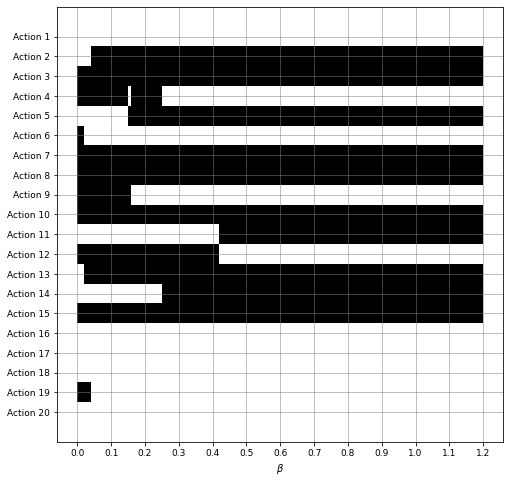

In [25]:
y_ticks_labels = ["Action "+ str(i) for i in range(1,21)]
betas = list(s2.interaction_effects_dict.keys())

fig, ax = plt.subplots(figsize=(8,8))
#create simple line plot

ax.plot([0, 1.2],[0, 20], alpha=0)
#ax.title
ax.set_xticks(list(np.arange(0,1.3,0.1)))
ax.set_yticks(np.arange(0.5,20,1))
[ax.axhline(y=i, color="gray", linewidth=0.5) for i in list(np.arange(0.5,20,1))]
[ax.axvline(x=i, color="gray", linewidth=0.5) for i in list(np.arange(0,1.3,0.1))]

ax.set_yticklabels(y_ticks_labels[::-1], fontsize=9)
ax.set_xticklabels(np.arange(0,1.3,0.1), fontsize=9)
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax.set_xlabel(r"$\beta$")
#ax.axvline(1)

for project in range(0,20):
    for inter in range(len(betas)):
        fig_loc = (betas[inter], 19-project)
        val = raw_table(s2).iloc[project, inter+1]
        if val==1:
            ax.add_patch(Rectangle(fig_loc, 0.01, 1,
                         edgecolor = 'black',
                         facecolor = 'black',
                         fill=True,
                         lw=0))

plt.show()

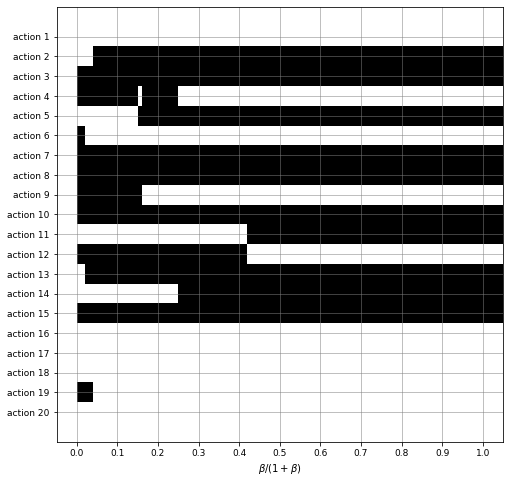

In [62]:
fig, ax = plt.subplots(figsize=(8,8))
#create simple line plot

ax.plot([0, 1],[0, 20], alpha=0)
#ax.title
ax.set_xticks(list(np.arange(0,1.1,0.1)))
ax.set_yticks(np.arange(0.5,20,1))
[ax.axhline(y=i, color="gray", linewidth=0.5) for i in list(np.arange(0.5,20,1))]
[ax.axvline(x=i, color="gray", linewidth=0.5) for i in list(np.arange(0,1.1,0.1))]

ax.set_yticklabels(y_ticks_labels[::-1], fontsize=9)
ax.set_xticklabels(np.arange(0,1.1,0.1), fontsize=9)
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax.set_xlabel(r"$\beta/(1+\beta)$")

for project in range(0,20):
    for inter in range(len(betas)):
        fig_loc = (betas[inter], 19-project)
        val = raw_table(s2).iloc[project, inter+1]
        if val==1:
            ax.add_patch(Rectangle(fig_loc, 0.01, 1,
                         edgecolor = 'black',
                         facecolor = 'black',
                         fill=True,
                         lw=0))

plt.show()